In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import tarfile
from skimage import data
from os import remove
from skimage.color import rgb2gray
from numpy import load
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape,ZeroPadding2D,Activation,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SpatialDropout2D
from matplotlib import pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
import os
os.chdir('/content/drive/My Drive/Minería de Datos/Train-Test 90%')

datos= load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/x_test.npz') ; X_test = datos['arr_0']
datos= load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/x_train.npz') ; X_train = datos['arr_0']
datos= load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/y_test_s.npz') ; y_test = datos['arr_0']
datos= load('/content/drive/My Drive/Minería de Datos/Train-Test 90%/y_train_s.npz') ; y_train = datos['arr_0']

In [5]:
print('X_test =',X_test.shape)
print('X_train =',X_train.shape)
print('y_test =',y_test.shape)
print('y_train =',y_train.shape)

X_test = (1177, 200, 200, 3)
X_train = (10584, 200, 200, 3)
y_test = (1177, 2)
y_train = (10584, 2)


In [0]:
def model(input_shape):
    # Define the input placeholder. 
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (3, 3),padding='same',name='Conv16')(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3),padding='same',name='Conv32')(X) 
    X = BatchNormalization(axis = 3,)(X)
    X = Dropout(0.5)(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_2')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3),padding='same',name='Conv64')(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Dropout(0.5)(X)
    X = Activation('relu')(X)
       
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_3')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(2, activation='sigmoid', name='final')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Sexo_Model')
    
    return model

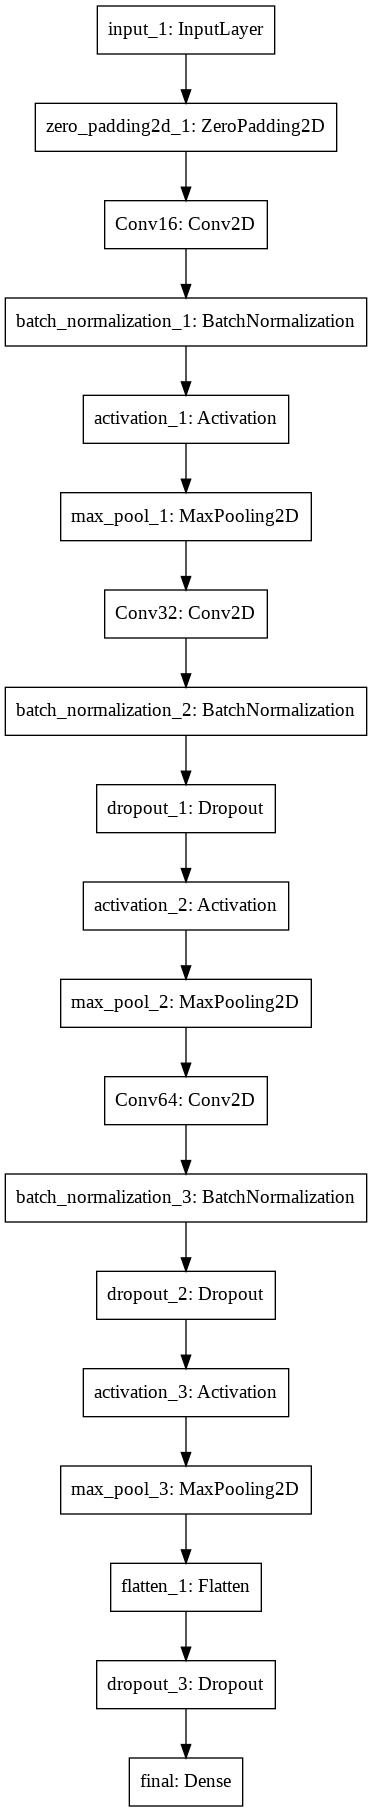

In [7]:
Modelo = model((200,200,3))
plot_model(Modelo)

In [8]:
Modelo.summary()

Model: "Sexo_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 206, 206, 3)       0         
_________________________________________________________________
Conv16 (Conv2D)              (None, 206, 206, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 206, 206, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 206, 206, 16)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 103, 103, 16)      0         
_________________________________________________________________
Conv32 (Conv2D)              (None, 103, 103, 32)      4

In [0]:
Modelo.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [11]:
history= Modelo.fit(x = X_train,y = y_train,validation_data=(X_test,y_test),epochs =40 ,batch_size = 32)

Train on 10584 samples, validate on 1177 samples
Epoch 1/40
10584/10584 [==============================] - 604s 57ms/step - loss: 0.4684 - accuracy: 0.8211 - val_loss: 0.4015 - val_accuracy: 0.8547
Epoch 2/40
10584/10584 [==============================] - 613s 58ms/step - loss: 0.3296 - accuracy: 0.8594 - val_loss: 0.4273 - val_accuracy: 0.8564
Epoch 3/40
10584/10584 [==============================] - 616s 58ms/step - loss: 0.2838 - accuracy: 0.8797 - val_loss: 0.4030 - val_accuracy: 0.8059
Epoch 4/40
10584/10584 [==============================] - 615s 58ms/step - loss: 0.2658 - accuracy: 0.8871 - val_loss: 0.3474 - val_accuracy: 0.8849
Epoch 5/40
10584/10584 [==============================] - 607s 57ms/step - loss: 0.2527 - accuracy: 0.8934 - val_loss: 0.3845 - val_accuracy: 0.8683
Epoch 6/40
10584/10584 [==============================] - 597s 56ms/step - loss: 0.2370 - accuracy: 0.8990 - val_loss: 0.3484 - val_accuracy: 0.8590
Epoch 7/40
10584/10584 [==============================] -

In [12]:
preds = Modelo.evaluate(x = X_test,y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1177/1177 [==============================] - 20s 17ms/step

Loss = 0.2651312249564679
Test Accuracy = 0.8840271830558777


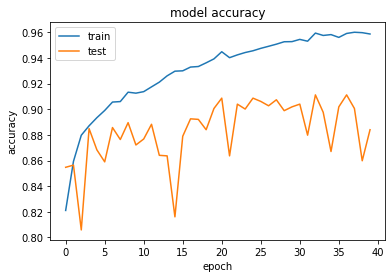

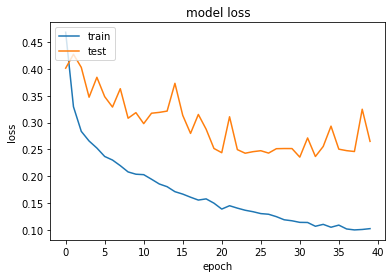

In [13]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
Modelo.save('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo.h5')


In [0]:
Modelo = keras.models.load_model('/content/drive/My Drive/Minería de Datos/Train-Test 90%.modelo1_sexo.h5')